In [1]:
import matplotlib.pyplot as plt
import math
import time 
import pandas as pd
import numpy as np
from scipy import spatial
from timeit import default_timer as timer
from IPython.core.debugger import set_trace
##from docplex.mp.model import Model
#import docplex.mp.solution as Solucion

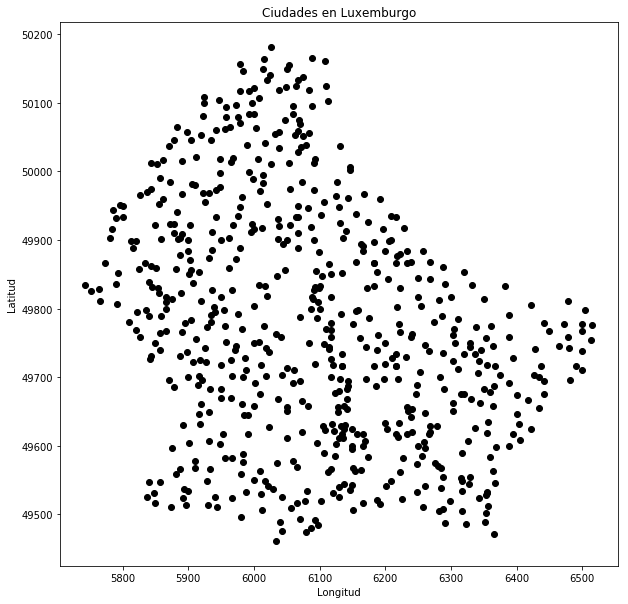

In [2]:
coordenadas=pd.read_csv(r"data.csv") #Importamos el documento que contiene las coordendas de las ciudades
coordenadas.columns=["ciudad", "c_x", "c_y"] #nombres de las columnas del dataframe
coordenadas = coordenadas.drop("ciudad", axis=1)#quitar la columna del número de ciudad
coordenadas = coordenadas.drop_duplicates() #quitamos las ciudades repetidas

ciudades=[i for i in range(len(coordenadas))] #Se crean las 634 ciuades
caminos =[(i,j) for i in ciudades for j in ciudades if i!=j] #todos las uniones posibles entre ciudades



lo=coordenadas["c_x"].tolist() #coordendas de longitud
la=coordenadas["c_y"].tolist() #coordenadas de latitud


plt.figure(figsize=(10,10)) #Grafiquemos las ciudades de Luxemburgo
plt.scatter(la,lo,color='black')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ciudades en Luxemburgo")  
plt.show()

matriz_distancias = spatial.distance.cdist(coordenadas, coordenadas, metric='euclidean') #Creamos la matriz de distancias donde la entrada (i,j) es la distancia de la ciudad i a la ciudad j
matriz_distancias =pd.DataFrame(matriz_distancias) #Convertimos en array en un DataFrame
matriz_distancias = matriz_distancias.astype(int) #lo redondeamos


##-------------------------------------------------------------



In [3]:
#Codigos originales Sofia 
def ciudades_sin_visitar(sin_visitar):
    for i in sin_visitar:
        if i == 1:
            return True
    return False


def mejor_ruta(ciudades, ruta, min_distancia):
    ruta_mas_corta= ruta[0]
    distancia_mas_corta = min_distancia.item(0)
    for ciudad_inicial in range(0, ciudades):
        if min_distancia[ciudad_inicial] < distancia_mas_corta:
            distancia_mas_corta = min_distancia.item(ciudad_inicial)
            ruta_mas_corta = ruta[ciudad_inicial]

    print("La distancia mínima es de: " + str(distancia_mas_corta))
    print("La ruta más corta es: ")
    print(ruta_mas_corta)

    return distancia_mas_corta, ruta_mas_corta
def algorithm(n):
    ciudades = n #len(matriz_distancias) #número de ciudades que queremos en la ruta
    m = matriz_distancias #renonmbramos para facilitar el algoritmo

    min_distancia = np.zeros((ciudades,), dtype=float)  # distancia mínima del nodo inicial
    ruta = [[0 for i in range(0, ciudades)] for k in range(0, ciudades)]

    # primero seleccionamos la ciuadad inicial
    for ciudad_inicial in range(0, ciudades):
        #print("Iteracion")
        #print(ruta)
        # Repetir hasta que todas las ciudades se visiten a lo más una vez
        sin_visitar = np.ones((ciudades,), dtype=int)  # ningún nodo se ha visitado
        sin_visitar[ciudad_inicial] = 0
        ruta[ciudad_inicial][0] = ciudad_inicial  # travel route starts with start_node

        ciudad = ciudad_inicial
        it = 1
        while ciudades_sin_visitar(sin_visitar) and it < ciudades:
            # Buscamos todos los caminos (arcos) que salen del la primera ciudad que se visita y van a un nodo no visitado y se elige el más corto
            cercano_cam = float('inf')
            cercano_ciud = ciudades

            for ciudad2 in range(0, ciudades):
                if sin_visitar[ciudad2] == 1 and 0 < m[ciudad][ciudad2] < cercano_cam:
                    cercano_cam =  m[ciudad][ciudad2]
                    cercano_ciud = ciudad2

            if  cercano_ciud >= ciudades:
                min_distancia[ciudad_inicial] = float('inf')
                break

            ciudad =  cercano_ciud
            sin_visitar[ciudad] = 0
            min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + cercano_cam
            ruta[ciudad_inicial][it] = ciudad
            it = it + 1

        if not math.isinf(min_distancia[ciudad_inicial]):
            ultima_vis = ruta[ciudad_inicial][ciudades-1]
            if m[ultima_vis][ciudad_inicial] > 0:
                min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + m[ultima_vis ][ciudad_inicial]
            else:
                min_distancia[ciudad_inicial] = float('inf')


    [distancia_mas_corta, ruta_mas_corta] = mejor_ruta(ciudades, ruta, min_distancia)

    return distancia_mas_corta, ruta_mas_corta


In [9]:
#Codigos para medir la complejidad (tiempo)
def mejor_ruta_no_output(ciudades, ruta, min_distancia):
    #set_trace()
    ruta_mas_corta= ruta[0]
    distancia_mas_corta = min_distancia.item(0)
    for ciudad_inicial in range(0, ciudades):
        if min_distancia[ciudad_inicial] < distancia_mas_corta:
            distancia_mas_corta = min_distancia.item(ciudad_inicial)
            ruta_mas_corta = ruta[ciudad_inicial]
    return distancia_mas_corta, ruta_mas_corta

def algorithm_no_output(n):
    ciudades = n #len(matriz_distancias) #número de ciudades que queremos en la ruta
    m = matriz_distancias #renonmbramos para facilitar el algoritmo
    min_distancia = np.zeros((ciudades,), dtype=float)  # distancia mínima del nodo inicial
    ruta = [[0 for i in range(0, ciudades)] for k in range(0, ciudades)]
    # primero seleccionamos la ciuadad inicial
    for ciudad_inicial in range(0, ciudades):
        # Repetir hasta que todas las ciudades se visiten a lo más una vez
        sin_visitar = np.ones((ciudades,), dtype=int)  # ningún nodo se ha visitado
        sin_visitar[ciudad_inicial] = 0
        ruta[ciudad_inicial][0] = ciudad_inicial  # travel route starts with start_node
        ciudad = ciudad_inicial
        it = 1
        #print("ciudad inicial: ", ciudad_inicial)
        while ciudades_sin_visitar(sin_visitar) and it < ciudades:
            # Buscamos todos los caminos (arcos) que salen del la primera ciudad que se visita y van a un nodo no visitado y se elige el más corto
            cercano_cam = float('inf')
            cercano_ciud = ciudades

            for ciudad2 in range(0, ciudades):
                if sin_visitar[ciudad2] == 1 and 0 < m[ciudad][ciudad2] < cercano_cam:
                    cercano_cam =  m[ciudad][ciudad2]
                    cercano_ciud = ciudad2

            if  cercano_ciud >= ciudades:
                min_distancia[ciudad_inicial] = float('inf')
                break
            #print("Ciudad: ", ciudad)
            #print("cercano_ciud: ", cercano_ciud)
            #print("cercano_cam", cercano_cam)
            ciudad =  cercano_ciud
            sin_visitar[ciudad] = 0
            min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + cercano_cam
            ruta[ciudad_inicial][it] = ciudad
            it = it + 1
            #print("min_distancia", min_distancia[ciudad_inicial])
            #print("-----------")
            
        if not math.isinf(min_distancia[ciudad_inicial]):
            #print("visitado")
            ultima_vis = ruta[ciudad_inicial][ciudades-1]
            if m[ultima_vis][ciudad_inicial] > 0:
                min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + m[ultima_vis][ciudad_inicial]
            else:
                min_distancia[ciudad_inicial] = float('inf')
            #print("ultima visita", ultima_vis)
            #print("min_distancia: ",min_distancia[ciudad_inicial])

    [distancia_mas_corta, ruta_mas_corta] = mejor_ruta_no_output(ciudades, ruta, min_distancia)

    return distancia_mas_corta


In [54]:
caminoI = [1,5,6,2,7,9,8,12,13,19,0]
loI = [1,5,6,2,7,9,8,12,13,19,0]
laI = [1,5,6,2,7,9,8,12,13,19,0]
for i in range(0, len(caminoI)):
    loI[i] = lo[caminoI[i]]
    laI[i] = la[caminoI[i]]

In [62]:
caminoII = [0, 22, 4, 11, 14, 15, 10, 16, 17, 18, 3, 20, 21, 1]
loII = [0, 22, 4, 11, 14, 15, 10, 16, 17, 18, 3, 20, 21, 1]
laII = [0, 22, 4, 11, 14, 15, 10, 16, 17, 18, 3, 20, 21, 1]
for i in range(0, len(caminoII)):
    loII[i] = lo[caminoII[i]]
    laII[i] = la[caminoII[i]]

In [59]:
caminoIII = [0, 21, 20, 3, 18, 17, 15, 14, 11, 10, 16, 4, 1]
loIII = [0, 21, 20, 3, 18, 17, 15, 14, 11, 10, 16, 4, 1]
laIII = [0, 21, 20, 3, 18, 17, 15, 14, 11, 10, 16, 4, 1]
for i in range(0, len(caminoIII)):
    loIII[i] = lo[caminoIII[i]]
    laIII[i] = la[caminoIII[i]]

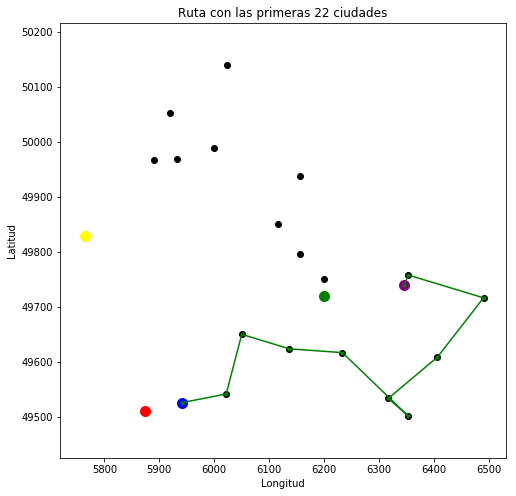

In [77]:
#Camino I 
plt.figure(figsize=(8,8)) #Grafiquemos las ciudades de Luxemburgo
plt.plot(laI, loI, '.g-')
plt.scatter(la[0],lo[0],color='blue',s=100)
plt.scatter(la[1:22],lo[1:22],color='black')
plt.scatter(la[22],lo[22],color='red',s=100)
plt.scatter(la[21], lo[21], color='green',s=100)
plt.scatter(la[4], lo[4], color='yellow',s=100)
plt.scatter(la[1], lo[1], color='purple',s=100)
plt.axis('equal')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ruta con las primeras 22 ciudades")  
plt.show()


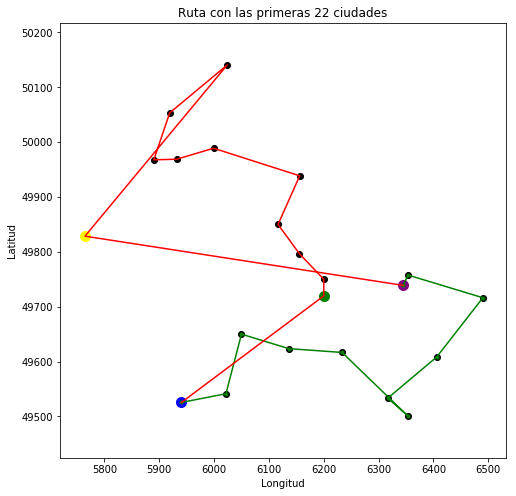

In [78]:
#Camino III 
plt.figure(figsize=(8,8)) #Grafiquemos las ciudades de Luxemburgo
plt.plot(laI, loI, '.g-')
plt.plot(laIII, loIII, 'r-')
plt.scatter(la[0],lo[0],color='blue',s=100)
plt.scatter(la[1:22],lo[1:22],color='black')
#plt.scatter(la[22],lo[22],color='red',s=100)
plt.scatter(la[21], lo[21], color='green',s=100)
plt.scatter(la[4], lo[4], color='yellow',s=100)
plt.scatter(la[1], lo[1], color='purple',s=100)
plt.axis('equal')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ruta con las primeras 22 ciudades")  
plt.show()


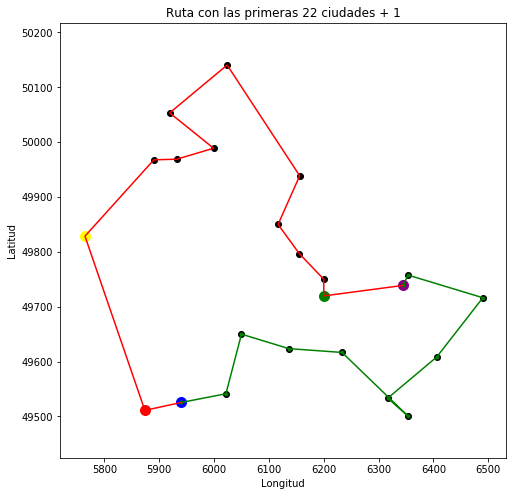

In [79]:
#Camino II
plt.figure(figsize=(8,8)) #Grafiquemos las ciudades de Luxemburgo
plt.plot(laI, loI, '.g-')
plt.plot(laII, loII, 'r-')
plt.scatter(la[0],lo[0],color='blue',s=100)
plt.scatter(la[1:22],lo[1:22],color='black')
plt.scatter(la[22],lo[22],color='red',s=100)
plt.scatter(la[21], lo[21], color='green',s=100)
plt.scatter(la[4], lo[4], color='yellow',s=100)
plt.scatter(la[1], lo[1], color='purple',s=100)
plt.axis('equal')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ruta con las primeras 22 ciudades + 1")  
plt.show()


In [ ]:
[1, 5, 6, 2, 7, 9, 8, 12, 13, 19, 0, 22, 4, 11, 14, 15, 10, 16, 17, 18, 3, 20, 21] #23 2590 
[1, 5, 6, 2, 7, 9, 8, 12, 13, 19, 0, 21, 20, 3, 18, 17, 15, 14, 11, 10, 16, 4] #22 3081 


In [16]:
tiempo = []
distancia = []
num = 10
for i in range(0,61):
    inicio = timer()
    dist = algorithm_no_output(num)
    final = timer()
    tiempo.append(final - inicio)
    distancia.append(dist)
    num = num + 10 
    np.savetxt("tiempo.txt", tiempo)
    np.savetxt("distancia.txt", distancia)

[49738.8889,
 49757.7778,
 49716.3889,
 49608.3333,
 49533.3333,
 49501.3889,
 49616.6667,
 49623.6111,
 49650.0,
 49541.3889,
 49525.5556]

In [117]:
for i in range(0,10):
    inicio = timer()
    dist = algorithm_no_output(num)
    final = timer()
    tiempo.append(final - inicio)
    distancia.append(dist)
    num = num + 10 
print(tiempo)

KeyboardInterrupt: 

In [203]:
np.savetxt("tiempo.txt", tiempo)
np.savetxt("distancia.txt", distancia)

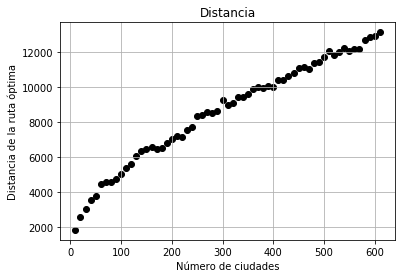

In [31]:
plt.scatter(range(10,620, 10), (distancia), color = "black")
plt.xlabel("Número de ciudades")
plt.ylabel("Distancia de la ruta óptima")
plt.title("Distancia")
plt.grid()
plt.show()

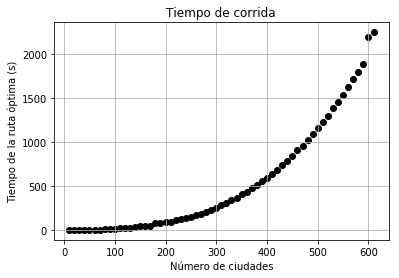

In [33]:
plt.scatter(range(10,620, 10), (tiempo), color = "black")
plt.xlabel("Número de ciudades")
plt.ylabel("Tiempo de la ruta óptima (s)")
plt.title("Tiempo de corrida")
plt.grid()
plt.show()

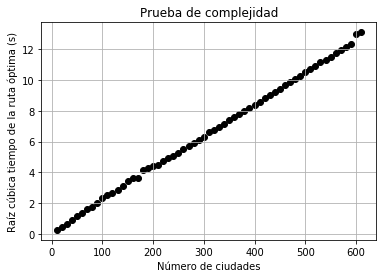

In [32]:
plt.scatter(range(10,620, 10), np.cbrt(tiempo), color = "black")
plt.xlabel("Número de ciudades")
plt.ylabel("Raíz cúbica tiempo de la ruta óptima (s)")
plt.title("Prueba de complejidad")
plt.grid()
plt.show()

In [ ]:
algorithm_no_output(5)

In [208]:
distancia

[1828.0,
 2056.0,
 2061.0,
 2071.0,
 2159.0,
 2167.0,
 2202.0,
 2471.0,
 2529.0,
 2550.0]

range(6, 8)